In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('severe_cases_score_data.csv')
df.head()

,Unnamed: 0,FIPS,State,County,Severe COVID Case Complications,covid_cases,% Adults 65 and Older,% Diagnosed Diabetes,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate,COPD Mortality Rate,% Smokers
0,0,1001,Alabama,Autauga,51.721197,9012,15.973,11.4,32.7,388.7,179.6,73.41,18.081557
1,1,1003,Alabama,Baldwin,39.964354,34063,20.978,8.2,30.1,362.6,143.4,45.27,17.489033
2,2,1005,Alabama,Barbour,71.258434,3184,19.691,15.1,41.2,444.3,217.2,60.07,21.999985
3,3,1007,Alabama,Bibb,59.971356,3628,16.670,12.2,37.4,491.8,143.3,75.08,19.114200
4,4,1009,Alabama,Blount,56.204965,8862,18.701,12.2,32.5,437.9,112.4,78.32,19.208672


In [3]:
df.isnull().sum()

Unnamed: 0                         0
FIPS                               0
State                              0
County                             0
Severe COVID Case Complications    0
covid_cases                        0
% Adults 65 and Older              0
% Diagnosed Diabetes               0
% Adults with Obesity              0
Heart Disease Death Rate           0
Hypertension Death Rate            0
COPD Mortality Rate                0
% Smokers                          0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       3142 non-null   int64  
 1   FIPS                             3142 non-null   int64  
 2   State                            3142 non-null   object 
 3   County                           3142 non-null   object 
 4   Severe COVID Case Complications  3142 non-null   float64
 5   covid_cases                      3142 non-null   int64  
 6   % Adults 65 and Older            3142 non-null   float64
 7   % Diagnosed Diabetes             3142 non-null   float64
 8   % Adults with Obesity            3142 non-null   float64
 9   Heart Disease Death Rate         3142 non-null   float64
 10  Hypertension Death Rate          3142 non-null   float64
 11  COPD Mortality Rate              3142 non-null   float64
 12  % Smokers           

In [6]:
df.columns

Index(['Unnamed: 0', 'FIPS', 'State', 'County',
       'Severe COVID Case Complications', 'covid_cases',
       '% Adults 65 and Older', '% Diagnosed Diabetes',
       '% Adults with Obesity', 'Heart Disease Death Rate',
       'Hypertension Death Rate', 'COPD Mortality Rate', '% Smokers'],
      dtype='object')

In [7]:
df = df.drop(columns=['Unnamed: 0', 'FIPS', 'State', 'County'])
df.head()

,Severe COVID Case Complications,covid_cases,% Adults 65 and Older,% Diagnosed Diabetes,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate,COPD Mortality Rate,% Smokers
0,51.721197,9012,15.973,11.4,32.7,388.7,179.6,73.41,18.081557
1,39.964354,34063,20.978,8.2,30.1,362.6,143.4,45.27,17.489033
2,71.258434,3184,19.691,15.1,41.2,444.3,217.2,60.07,21.999985
3,59.971356,3628,16.670,12.2,37.4,491.8,143.3,75.08,19.114200
4,56.204965,8862,18.701,12.2,32.5,437.9,112.4,78.32,19.208672


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Severe COVID Case Complications  3142 non-null   float64
 1   covid_cases                      3142 non-null   int64  
 2   % Adults 65 and Older            3142 non-null   float64
 3   % Diagnosed Diabetes             3142 non-null   float64
 4   % Adults with Obesity            3142 non-null   float64
 5   Heart Disease Death Rate         3142 non-null   float64
 6   Hypertension Death Rate          3142 non-null   float64
 7   COPD Mortality Rate              3142 non-null   float64
 8   % Smokers                        3142 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 221.0 KB


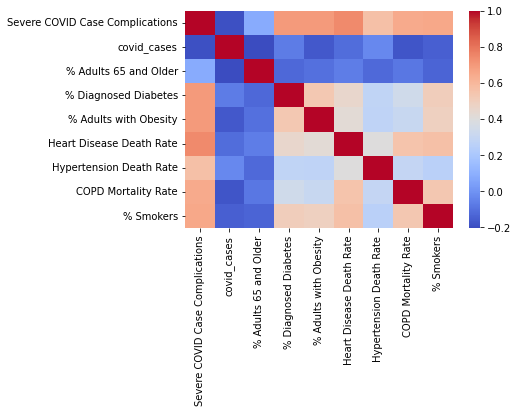

In [9]:
plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [10]:
X = df.drop(columns=['Severe COVID Case Complications'])
y = df[['Severe COVID Case Complications']]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)


In [13]:
lr

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)
#y_pred

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)
#mean_squared_error(y_test, y_pred)

0.933959426176047

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(y_test, y_pred):

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, r2


In [17]:
mae, mse, r2 = evaluate_regression_model(y_test, y_pred)

In [18]:
mae

3.0985485643397075

In [19]:
mse

17.862331781659414

In [20]:
r2

0.933959426176047

These are evaluation metrics for a regression model. Here's what they mean:

MAE (Mean Absolute Error) - This is the average absolute difference between the predicted and actual values. In other words, it gives you an idea of how far off your predictions are on average. A lower MAE is better, and a MAE of 3.098 means that on average, the model's predictions are off by about 3.1 units.

MSE (Mean Squared Error) - This is the average of the squared differences between the predicted and actual values. Squaring the differences gives more weight to larger errors. A lower MSE is better, and a MSE of 17.862 means that the model's predictions are off by about 17.9 units (on average, squared).

R2 (R-Squared) - This is a measure of how well the model fits the data. It represents the proportion of variance in the dependent variable that is explained by the independent variables. An R2 of 0.93 means that about 93% of the variance in the dependent variable is explained by the independent variables in the model. A higher R2 is better, and a perfect fit would have an R2 of 1.0.

Overall, these metrics suggest that the regression model has a good fit to the data and is making accurate predictions, with a relatively small average error (MAE) and a high proportion of variance explained (R2).

In [21]:
significant = lr.coef_[0]

<BarContainer object of 8 artists>

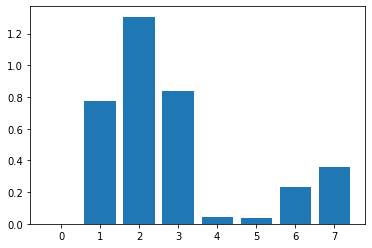

In [22]:
plt.bar([x for x in range(len(significant))], significant)

In [23]:
for i,v in enumerate(significant):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.77340
Feature: 2, Score: 1.30650
Feature: 3, Score: 0.83821
Feature: 4, Score: 0.04575
Feature: 5, Score: 0.03926
Feature: 6, Score: 0.23388
Feature: 7, Score: 0.35681
